In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataframe = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/diabetes/diabetes.csv')

In [4]:
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df_label = dataframe['Outcome']

In [6]:
df_features = dataframe.drop('Outcome', 1)

In [7]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

x = df_features.values
x_scaled = min_max_scaler.fit_transform(x)

df_features = pd.DataFrame(x_scaled)

df_features.head()

,0,1,2,3,4,5,6,7
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [8]:
label = []

for lab in df_label:
  if lab == 1:
    label.append([1, 0]) # class 1
  elif lab == 0:
    label.append([0, 1]) # class 0

In [9]:
data = np.array(df_features)

In [10]:
label = np.array(label)

In [11]:
data.shape, label.shape

((768, 8), (768, 2))

In [12]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=0)

In [16]:
from keras import regularizers

model = Sequential([
  Dense(150, input_dim=8, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
  Dropout(0.5),
  Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
  Dropout(0.5),
  Dense(2, activation='softmax')                  
])

In [17]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train, batch_size=128, epochs=1000, validation_data=(x_test, y_test))

Epoch 1/1000
5/5 [==============================] - 0s 33ms/step - loss: 0.3303 - accuracy: 0.6352 - val_loss: 0.3106 - val_accuracy: 0.6948
Epoch 2/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3187 - accuracy: 0.6417 - val_loss: 0.3034 - val_accuracy: 0.6948
Epoch 3/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3153 - accuracy: 0.6352 - val_loss: 0.2963 - val_accuracy: 0.6948
Epoch 4/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3051 - accuracy: 0.6368 - val_loss: 0.2891 - val_accuracy: 0.6948
Epoch 5/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.3014 - accuracy: 0.6450 - val_loss: 0.2820 - val_accuracy: 0.6883
Epoch 6/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.2958 - accuracy: 0.6612 - val_loss: 0.2759 - val_accuracy: 0.6883
Epoch 7/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.2917 - accuracy: 0.6466 - val_loss: 0.2705 - val_accuracy: 0.7013
Epoch 8/1000
5/5 [=

In [20]:
loss, val_loss = history.history['loss'], history.history['val_loss']
acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

In [21]:
epochs = range(1, len(acc) + 1)

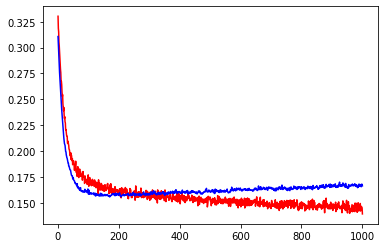

In [22]:
import matplotlib.pyplot as plt

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')

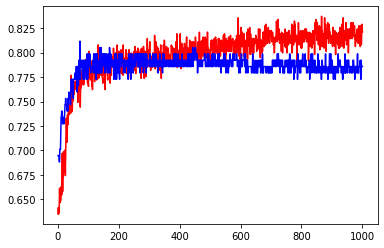

In [23]:

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')

In [27]:
# 
model.predict_classes([[0, 120, 80, 25, 100, 23, 0.3, 30]])

array([0])